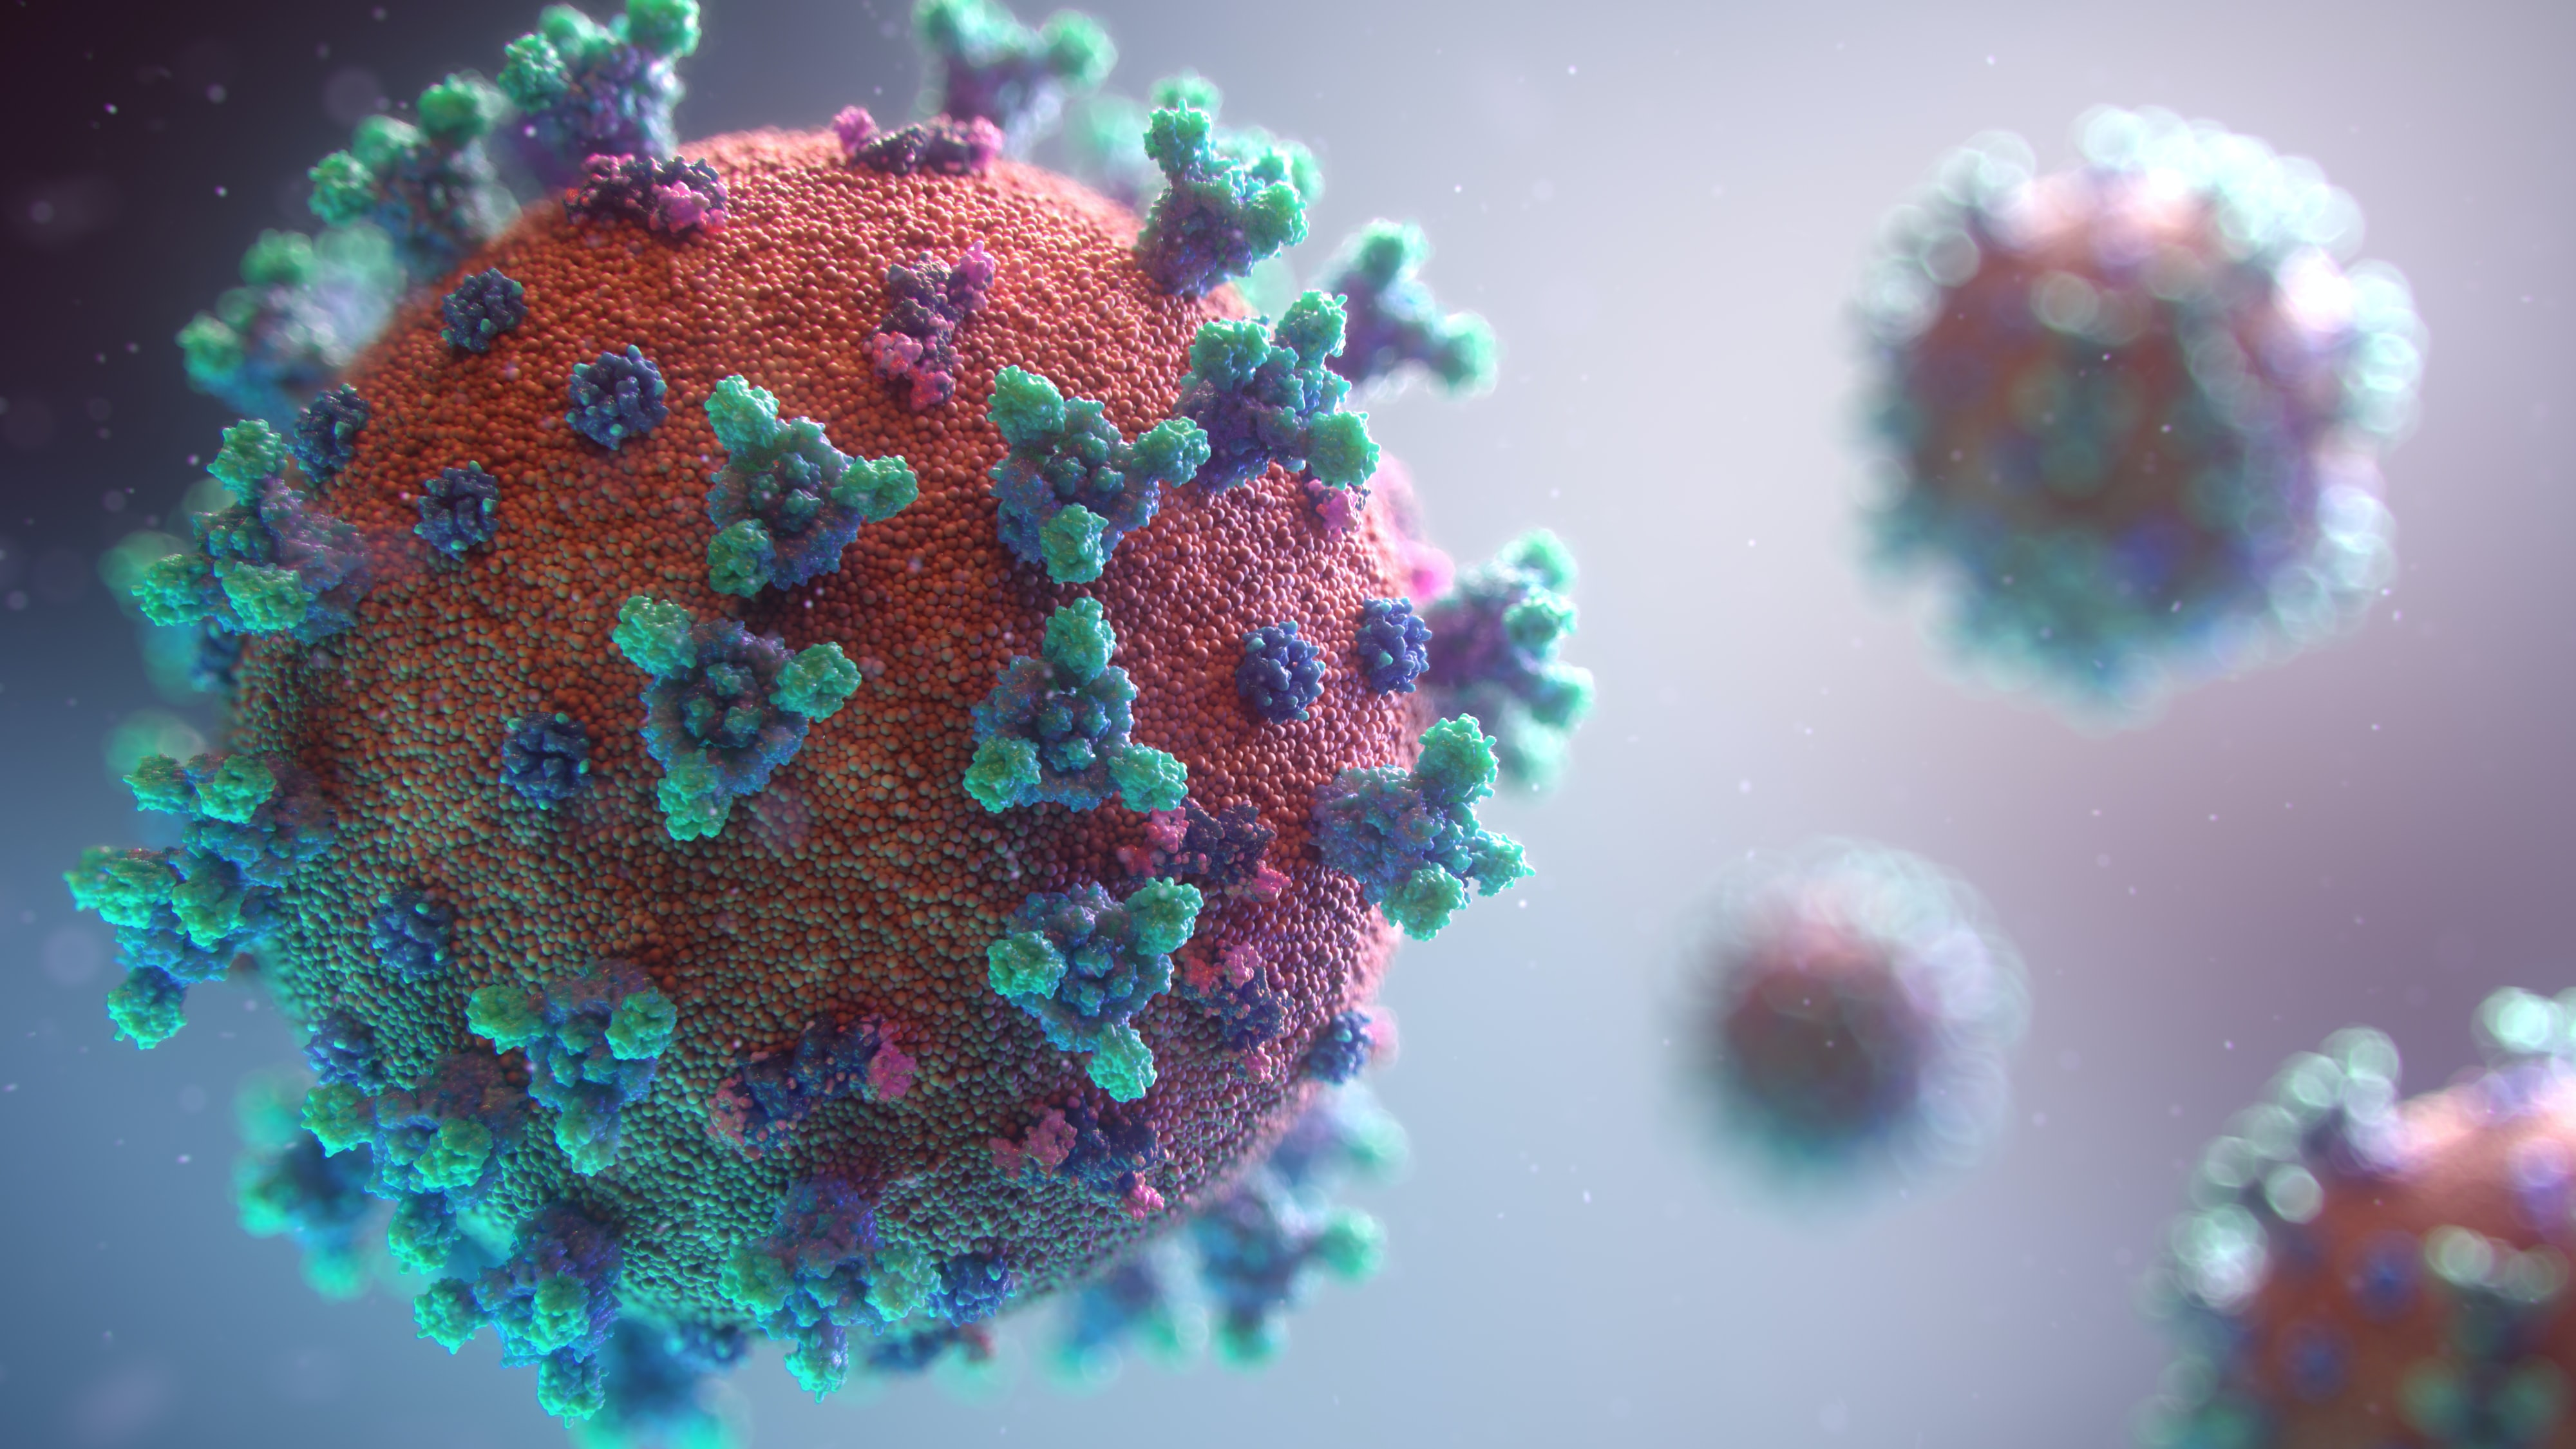

<span>Photo by <a href="https://unsplash.com/@fusion_medical_animation?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Fusion Medical Animation</a> on <a href="https://unsplash.com/@fusion_medical_animation?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

# SIR Model for the spread of a Pandemic (with Asymptomatic Case Compartment)
 ~ **Paul Joseph Robin**

SIR model is a compartmental model used in epidemiology to simplify the mathematical modelling of communicable diseases. This assumes vital dynamics (birth, death, etc.) of the system under consideration do not change. $S, I_A, I_S$ and $R$ are the compartments for _total_ **Suspected, Asymptomatic Infected, Symptomatic Infected** and **Recovered** individuals respectively, such that
$$ S + I_A + I_S + R = N $$
where N is the total population.

However we take a model such that it depends on the fraction of population,
$$ s + i_A + i_S + r = 1 $$

### Coupled first order equations for the model:
$$ \frac{ds}{dt} = - b s [i_A + i_S] $$
$$ \frac{dr}{dt} = - k [i_A + i_S] $$
$$ \frac{di_A}{dt} = a b s [i_A + i_S] - k i_A$$
    $$ \frac{di_S}{dt} = \bar{a} b s [i_A + i_S] - k i_S $$     
   $$ (\bar{a} = 1 - a)$$

where $s, r, i_A$ and $i_S$ are the _fractional_ **suspected**, **recovered**, **asymptomatic infected** and **symptomatic infected** respectively$^{[4]}$.
$a$ is the asymptomatic cases ratio, $b$ is the growth rate for new cases & $k$ is the recovery rate. 
Note: Deaths count as recovery too.



### Algorithm for iterative execution

$$ s(t+\Delta t) = s(t) - b\Delta t s(t)(i_A(t) + i_S(t)) $$
$$ r(t+\Delta t) = r(t) + \Delta t k ( i_A(t) + i_S(t) ) $$
$$ i_A(t+\Delta t) = i_A(t) + \Delta t [abs(t) ( i_A(t) +i_S(t) ) - ki_A(t) ]$$
$$ i_S(t+\Delta t) = i_S(t) + \Delta t [abs(t) ( i_A(t) +i_S(t) ) - ki_S(t) ]$$

In [1]:
s = 0.9999
a=0.65         # Asymptomatic cases ratio: There is no reliable study to determine the number of asymptotics. 
                # Rough data suggests that 50-75% of cases are asymptomatic

i = 0.0001
iA = a*i
iS = (1 - a)*i
r = 0.
t = 0
t_final = 125
delta_t = 0.1
N_slices = int(t_final/delta_t)

## Please Run the Notebook to use the interactive features!

In [2]:
import matplotlib.pyplot as plt # Plotting library imported
# Interactive Notebook
%matplotlib notebook

from ipywidgets import *
from IPython.display import display

In [3]:
def draw(s_list, iA_list, iS_list, r_list, t_list, total_fraction, ax):
    l1, = ax.plot(t_list, iA_list, linestyle = '-', color='red', label='asymptomatic')
    l2, = ax.plot(t_list, iS_list, linestyle = '-', color='brown', label='symptomatic')
    l3, = ax.plot(t_list, s_list, linestyle = '-', color='blue', label='susceptible')
    l4, = ax.plot(t_list, r_list, linestyle = '-', color='green', label='recovered')
    l5, = ax.plot(t_list, total_fraction, linestyle = '--', color='purple', label='total')
    
    plt.legend();
    return [l1, l2, l3, l4, l5]   

In [4]:
def simulator(s, iA, iS, r, t, delta_t, N_slices, b = 2, k = 0.33):
    s_list = [s]
    iA_list = [iA]
    iS_list = [iS]
    r_list = [r]
    t_list = [t]
    total_fraction = [s+iA+iS+r]
    
    for step in range(0,N_slices):
        s_temp = s - b*delta_t*s*(iA + iS)
        r_temp = r + k*delta_t*(iA + iS)
        iA_temp = iA + delta_t*(a*b*s*(iA + iS) - k*iA)
        iS_temp = iS + delta_t*((1 - a)*b*s*(iA + iS) - k*iS)
    
        s = s_temp
        r = r_temp
        iA = iA_temp
        iS = iS_temp
    
        t += delta_t
    
        s_list.append(s)
        r_list.append(r)
        iA_list.append(iA)
        iS_list.append(iS)
        t_list.append(t)
        total_fraction.append(s+r+iA+iS)

    return [s_list, iA_list, iS_list, r_list, t_list, total_fraction]

In [5]:
def sir(s, iA, iS, r, t, delta_t, N_slices, ax, b = 2.0, k = 0.33):
    
    s_list, iA_list, iS_list, r_list, t_list, total_fraction = simulator(s, iA, iS, r, t, delta_t, N_slices)
    l1, l2, l3, l4, l5 = draw(s_list, iA_list, iS_list, r_list, t_list, total_fraction, ax)  
    return [l1, l2, l3, l4, l5]

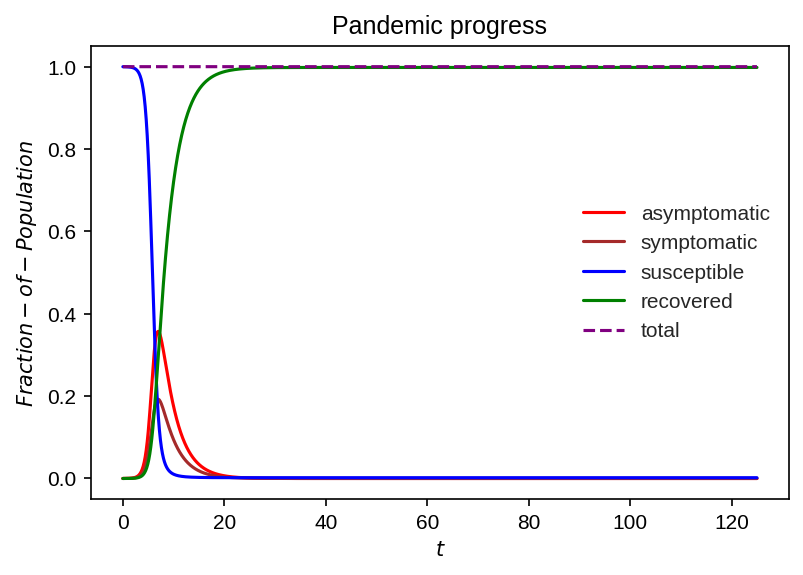

interactive(children=(FloatSlider(value=1.646, description='b:', max=10.0), FloatSlider(value=0.14285714285714…

In [6]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(1, 1, 1)
    
plt.xlabel(r'$t$') # Label of 'x' axis
plt.ylabel(r'$Fraction-of-Population$')
plt.style.use('seaborn-whitegrid')
plt.title('Pandemic progress') # Title of plot

l1, l2, l3, l4, l5 = sir(s, iA, iS, r, t, delta_t, N_slices, ax)

def update(b = FloatSlider(value=1.646, min=0, max=10, step=0.1, description='b:'),
     k = FloatSlider(value=1/7, min=0, max=10, step=0.01, description='k:')):
    
    s_list, iA_list, iS_list, r_list, t_list, total_fraction = simulator(s, iA, iS, r, t, delta_t, N_slices, b, k)
    
    l1.set_ydata(iA_list)
    l2.set_ydata(iS_list)
    l3.set_ydata(s_list)
    l4.set_ydata(r_list)
    l5.set_ydata(total_fraction)
    
    fig.canvas.draw_idle()

interact(update);    # USing decorators for iteractive display

#### $b$ is the infect rate, $k$ is recovery rate: Please take $k<b$.


## Data Analysis with Actual Cases

I have chosen a country, Italy, instead of a city, as it had already reached the peak of cases early and was on way for ending the infection$^{[6]}$. (Though a small bump is visible in the new data). It also **makes sense geographically as Italy has a land area of 3,01,300 km² which compares to the state of Maharashtra at 3,07,700 km²**.

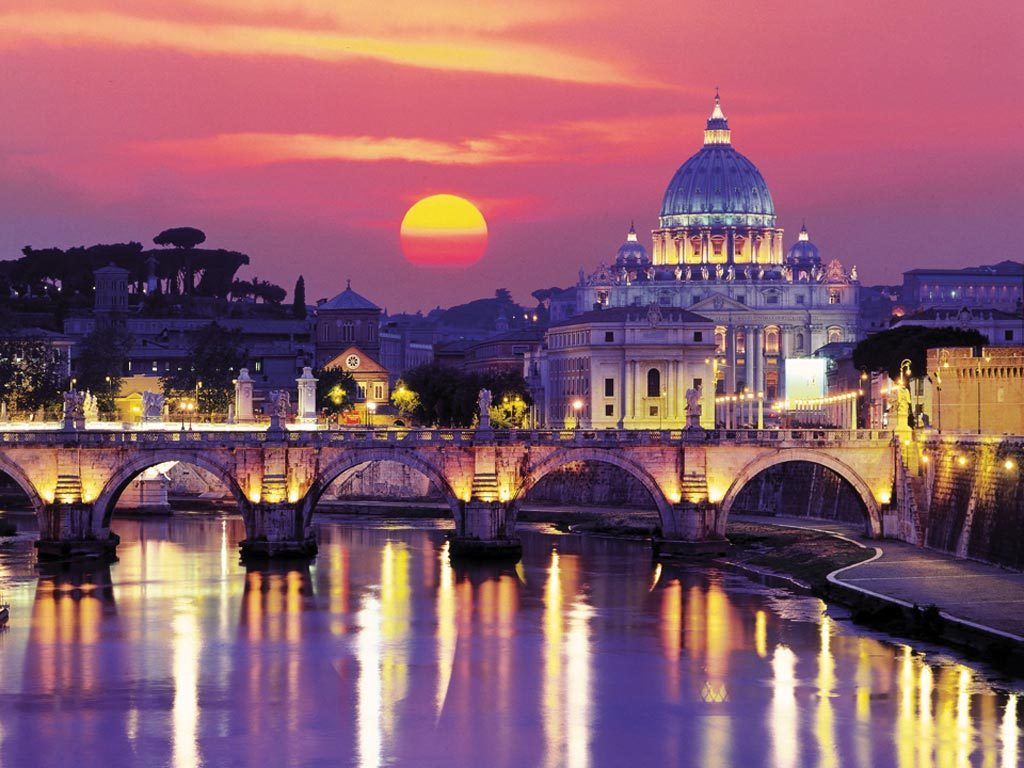

In [7]:
import pandas as pd    # Just to represent the data! Has a cool look.
import numpy as np
import xlrd

# Italy

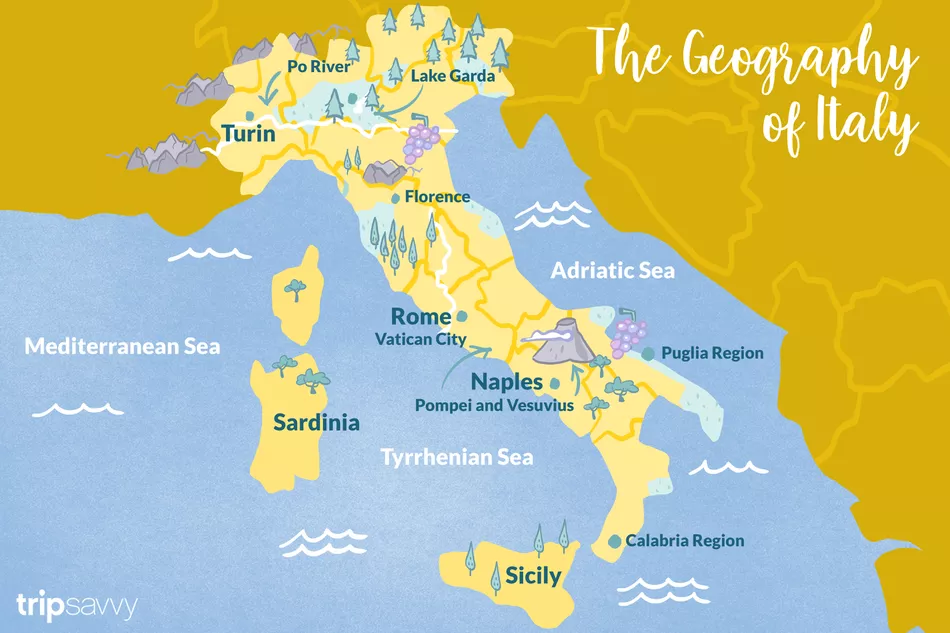

In [8]:
data = pd.read_excel('WHO-COVID-19-global-data.xlsx', sheet_name = 'Italy', index_col=None)
data

,Date_Reported,Country_Code,Country,WHO_Region,New_Cases,Cumulative_Cases,New_Deaths,Cumulative_Deaths,Day_No.
0,2020-01-29,IT,Italy,EURO,6,6,0,0,29
1,2020-01-30,IT,Italy,EURO,0,6,0,0,30
2,2020-01-31,IT,Italy,EURO,0,6,0,0,31
3,2020-02-01,IT,Italy,EURO,0,6,0,0,32
4,2020-02-02,IT,Italy,EURO,0,6,0,0,33
...,...,...,...,...,...,...,...,...,...
212,2020-08-28,IT,Italy,EURO,1409,263949,5,35463,241
213,2020-08-29,IT,Italy,EURO,1460,265409,9,35472,242
214,2020-08-30,IT,Italy,EURO,1444,266853,1,35473,243
215,2020-08-31,IT,Italy,EURO,1365,268218,4,35477,244


Note that the last column _DayNo._ starts at 29. This will be clear later on. 

In [9]:
workbook = xlrd.open_workbook('WHO-COVID-19-global-data.xlsx')
sheet = workbook.sheet_by_index(1)    # Sheet 2: Contains Italy data.

dates = [sheet.cell_value(i, 0) for i in range(1, sheet.nrows)]
new_cases = [sheet.cell_value(i, 4) for i in range(1, sheet.nrows)]
cumu_cases = [sheet.cell_value(i, 5) for i in range(1, sheet.nrows)]
new_deaths = [sheet.cell_value(i, 6) for i in range(1, sheet.nrows)]
cumu_deaths = [sheet.cell_value(i, 7) for i in range(1, sheet.nrows)]
day_num = [sheet.cell_value(i, 8) for i in range(1, sheet.nrows)] # starts at 29

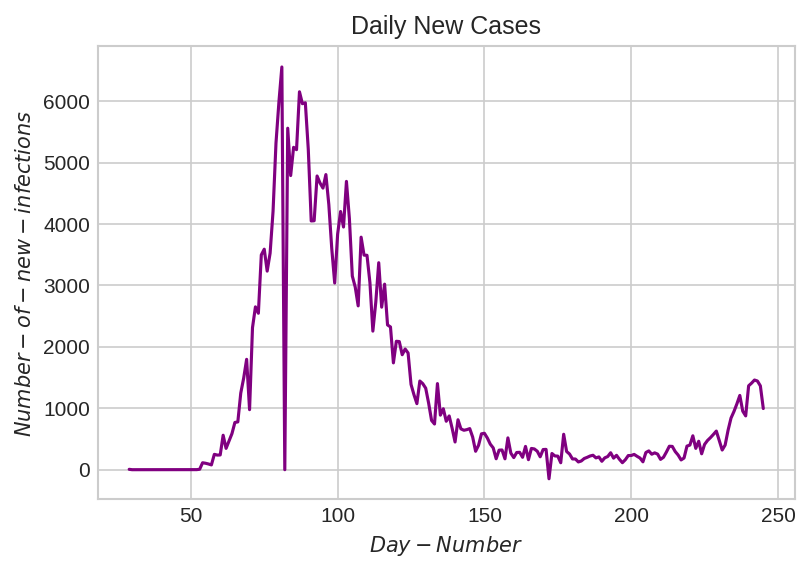

In [10]:
plt.figure(dpi = 150)

plt.plot(day_num, new_cases, color = 'purple')
plt.xlabel(r'$Day-Number$') # Label of 'x' axis
plt.ylabel(r'$Number-of-new-infections$')
plt.style.use('seaborn-whitegrid')
plt.title('Daily New Cases'); # Title of plot

*The number of cases reported on 2020-03-22 is 0*. This was a discrepancy in the data collection.  


#### In actual scenario $b$ and $k$ factors are not constant, but vary for the entire duration of infection. 

## Log-Normal Function

$$ f(x) = \frac{k}{\sqrt{2\pi}\sigma x} \exp{[-\frac{(\log(x) - \mu)^2}{2\sigma^2}]} (x>0)$$
Research suggests that a log-normal appears in the incubation period of viruses.

### The Model:
The log-normal function used for fitting the data is parameterised by $ a, b, c$ and the value of $t$ from the actual data$^{[2]}$:
$$ f(t) = \frac{a}{t} \exp{[-\frac{(\log(t) - b)^2}{c^2}]} $$

where $a$ represents the peak height, $b$ peak position & $c$ the width.


In [11]:
# Function to calculate the Log-Normal with constants a, b, and c
def lognormal(t, a, b, c):
    return a/t*np.exp(-np.power(np.log(t) - b, 2)/(2*np.power(c, 2)))


In [12]:
# First 53 days
x_var = day_num[0:53]
y_var = new_cases[0:53]

##### Using SciPy's built-in function *curve_fit()* $^{[1]}$

In [13]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit

# Fit the data
pars, cov = curve_fit(f=lognormal, xdata=x_var, ydata=y_var, p0=[65000, 8, 2], bounds=(-np.inf, np.inf),
                      maxfev=5000)
                    
# Calculate the residuals (error)
res = y_var - lognormal(x_var, *pars)

In [14]:
a,b,c = pars

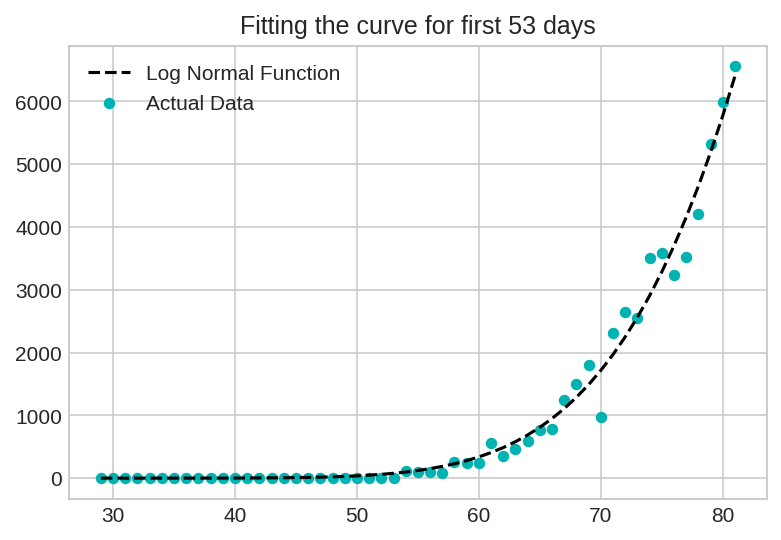

In [15]:
plt.figure(dpi = 150)

plt.title('Fitting the curve for first 53 days')
plt.scatter(x_var, y_var, s=20, color='#00b3b3', label='Actual Data')
plt.plot(x_var, lognormal(x_var, *pars), linestyle='--', color='black', label ='Log Normal Function');
plt.legend();

In [16]:
print('Values of a: {}, b: {}, c: {}'.format(a, b, c))

Values of a: 36668139.972750105, b: 5.3118544666263245, c: 0.31434465915576576


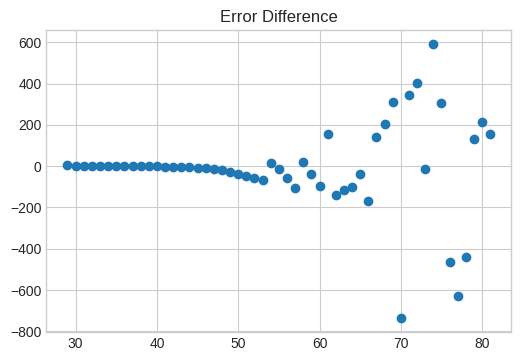

In [17]:
plt.figure(dpi = 100)
plt.title('Error Difference')
plt.scatter(x_var,res);

In [18]:
x_var = day_num
y_var = new_cases

In [19]:
pars, cov = curve_fit(f=lognormal, xdata=x_var, ydata=y_var, p0=[65000, 8, 2], bounds=(-np.inf, np.inf),
                      maxfev=5000)
res = y_var - lognormal(x_var, *pars)
a,b,c = pars

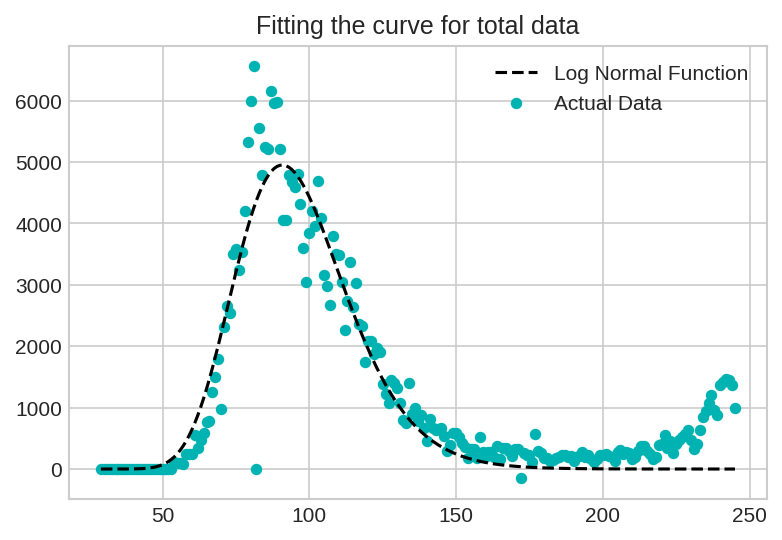

In [20]:
plt.figure(dpi = 150)

plt.title('Fitting the curve for total data')
plt.scatter(x_var, y_var, s=20, color='#00b3b3', label='Actual Data')
plt.plot(x_var, lognormal(x_var, *pars), linestyle='--', color='black', label ='Log Normal Function');
plt.legend();

In [21]:
print('a: {}, b: {}, c: {}'.format(a, b, c))

a: 458856.3765620573, b: 4.550374693971802, c: 0.20469405524674808


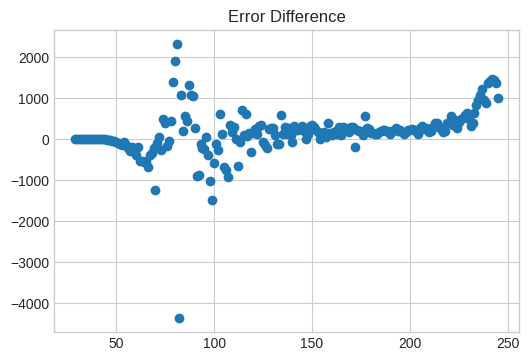

In [22]:
plt.figure(dpi = 100)
plt.title('Error Difference')
plt.scatter(x_var,res);

**Note that the fitting was very accurate before the peak. At the peak, the rise is beyond the log-normal and therfore the error in fitting rises.**

### Datasets & References:

1. [Basic Curve Fitting of Scientific Data with Python](https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509)
2. Curve-fitting approach for COVID-19 data and its physical background { *Yoshiro Nishimoto, Kenichi Inoue* } [medRxiv Preprint](https://www.medrxiv.org/content/10.1101/2020.07.02.20144899v2)
3. COVID-19: What proportion are asymptomatic? { *Carl Heneghan, Jon Brassey, Tom Jefferson* } [ (Centre for Evidence-Based Medicine, University of Oxford) ](https://www.cebm.net/covid-19/covid-19-what-proportion-are-asymptomatic/)
4. Age-structured impact of social distancing on the COVID-19 epidemic in India { _Rajesh Singh, R. Adhikari_ } [arXiv](https://arxiv.org/abs/2003.12055v1)
5. [COVID-19 dashboard CSSE Johns Hopkins University](https://coronavirus.jhu.edu/map.html)
6. [WHO TimeSeries](https://covid19.who.int/WHO-COVID-19-global-data.csv)
7. Implementation for Asymptomatic cases [p-jr](https://github.com/p-j-r/covid-19/blob/master/SIR_model_India.py)